In [2]:
import sys, os
sys.path.insert(0, os.path.abspath(".."))
import numpy as np
from itertools import product

from sailing import SailingGridworld
from common import helper as h

In [13]:
gamma = 0.9
eps = 1e-4 # TODO: use this value for Task 2 and Task 3
value_update_iter = 50 # TODO: change this in Task 2
rock_penalty = -2 # TODO: change this in Q1.3

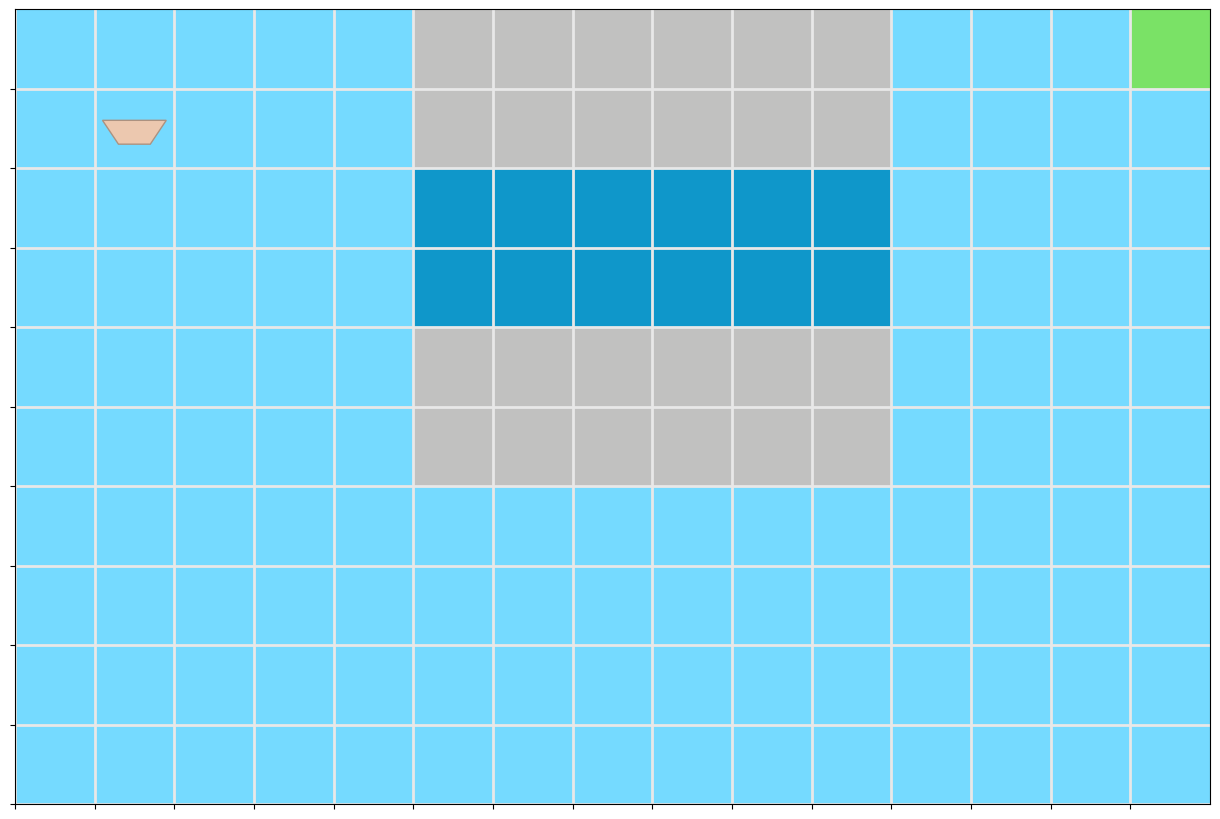

In [4]:
# Set up the environment
env = SailingGridworld(rock_penalty=rock_penalty, value_update_iter=value_update_iter)

In [5]:
def get_Q(x, y, v_est):
    Q = np.zeros(env.n_actions)
    for a in range(env.n_actions):
        tr = env.transitions[x, y, a]
        Q_a = 0
        for next_state, r, done, prob in tr:
            next_state_value = v_est[next_state] if next_state is not None else 0
            if done:
                Q_a += prob * r
            else:
                Q_a += prob * (r + gamma * next_state_value)
        Q[a] = Q_a
    # print(x, y, Q, np.max(Q), np.argmax(Q), prob)
    return np.max(Q), np.argmax(Q) # Q, V, policy

In [8]:
def get_values_policy(iterations):
    # V(s) is the max Q(s,a). Q is based on 
    v_est = np.zeros((env.w, env.h))
    new_v_est = np.zeros((env.w, env.h))
    policy = np.zeros((env.w, env.h))
    old_policy = np.zeros((env.w, env.h))
    env.draw_values_policy(v_est, policy)

    for i in range(iterations):
        # TODO: Task 1, implement the value iteration and policy
        # TODO: Task 2, convergency of the value function and policy

        ########## Your code starts here ##########
        
        # Estimate new state values and calculate policy
        # v_est = env.rewards * gamma + v_est * (1 - gamma)
        for x, y in product(range(env.w), range(env.h)):
            # new_v_est[x, y], policy[x, y] = get_Q(x, y, v_est)    
            
            Q = np.zeros(env.n_actions)
            for a in range(env.n_actions):
                tr = env.transitions[x, y, a]
                # Use single variable, instead of Q[a] np.array, much faster
                Q_a = 0   
                for next_state, r, done, prob in tr:
                    next_state_value = v_est[next_state] if next_state is not None else 0
                    if done:
                        Q_a += prob * r
                    else:
                        Q_a += prob * (r + gamma * next_state_value) 
                Q[a] = Q_a
            new_v_est[x, y] = np.max(Q)
            policy[x ,y] = np.argmax(Q)
        
        # Call env.draw_values_policy function after each iteration with your estimated state values and policy
        # to produce a GIF of the changing values (will be automatically created and saved)
        
        ########## Your code ends here ##########
        env.draw_values_policy(v_est, policy)
        max_diff = np.max(np.abs(v_est - new_v_est))

        print(f"iter {i}: Changed V {np.array_equal(v_est, new_v_est)}, Policy {np.array_equal(old_policy, policy)}")
        v_est = new_v_est
        old_policy = policy
        if max_diff < eps:
            print(f"Value converged at iteration{i} with eps {eps}")
        
    return v_est, policy


In [15]:

def get_values_policy(iterations):
    v_est = np.zeros((env.w, env.h))
    policy = np.zeros((env.w, env.h))
    env.draw_values_policy(v_est, policy)

    last_change = 0 # Sign the last time that the policy has changed
    first = True 
    
    for i in range(iterations):
        if i % 20 == 0:
            print(f"Iteration: {i}/100")
        # TODO: Task 1, implement the value iteration and policy
        # TODO: Task 2, convergency of the value function and policy

        ########## Your code starts here ##########
        temp_value = np.zeros((env.w, env.h))
        temp_policy = np.zeros((env.w, env.h))

        for x in range(env.w):
            for y in range(env.h):
                value_list = np.zeros(env.n_actions)
                for action in range(env.n_actions):
                    transitions = env.transitions[x, y, action]
                    action_value = 0 
                    for transition in transitions:
                        next_state, reward, done, prob = transition.state, transition.reward, transition.done, transition.prob
                        if done: 
                            action_value += prob * reward
                            continue
                        action_value += prob * (reward + gamma * v_est[next_state[0], next_state[1]]) 
                    value_list[action] = action_value
                next_value = np.max(value_list)
                temp_value[x, y] = next_value
                temp_policy[x, y] = np.argmax(value_list)
        
        # value function convergence
        delta = np.abs(v_est - temp_value).max()
        if delta < eps and i > 0 and first:
            first = False
            print(f"Value function has converged during iteration: {i}")
            
        v_est = temp_value

        # Policy convergence
        if np.array_equal(temp_policy, policy) == False: 
            last_change = i
        policy = temp_policy

        env.draw_values_policy(v_est, policy)
        
        if i +1 == iterations:
            print(f"The last change in the policy is: {last_change}")
        ########## Your code ends here ##########

    return v_est, policy

In [16]:
# value iteration -- update value estimation and policy
value_est, policy = get_values_policy(iterations=value_update_iter)

Iteration: 0/100
Iteration: 20/100
Value function has converged during iteration: 38
Iteration: 40/100
The last change in the policy is: 34


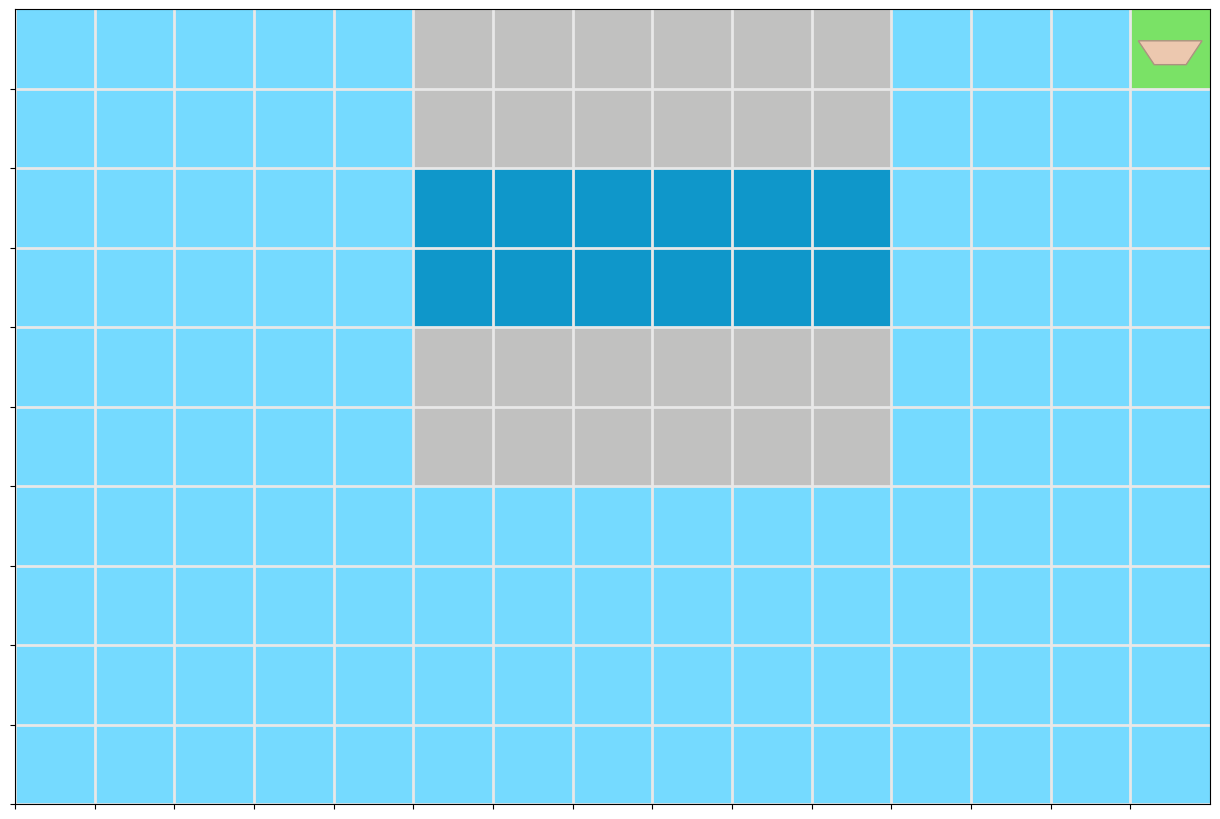

In [18]:
# Eval policy
N = 1 # TODO: change for task 4
for ep in range(N):
    state = env.reset()
    done = False
    while not done:

        ########## You code starts here ##########

        # TODO: Use the policy to take the optimal action (Task 1)
        action = policy[state[0], state[1]]

        # Take a step in the environment
        state, reward, done, _ = env.step(action)
        
        # TODO: Calculate discounted return for the initial state
        
        ########## You code ends here ##########
        
        # Comment out the line below to disable rendering and make computations faster
        env.render()


In [ ]:
# save value and policy
h.save_object({'value': value_est, 'policy': policy}, './value_policy.pkl')